## **DATA ANALYTICS PROGRAMMING PROJECT**

LECTURER NAME:

SECP3223-02
Group member:

| **No.** | **Name**                              | **Matric Number**         |
|---------|---------------------------------------|----------------|
| 1       | Nurul Erina Binti Zainuddin           | A22EC0254      |
| 2       | Thevan Raju A/L Jeganath              | A22EC0286      |
| 3       | Nur Farah Adibah Binti Idris          | A22EC0245      |
| 4       | Aliatul Izzah Binti Jasman            | A22EC0136      |
| 5       | Wan Nur Sofea Binti Mohd Hasbullah    | A22EC0115      |

[Link to video presentation](https://drive.google.com/file/d/14QzDgO7NeAO-9nuT9L_4qjG16Q7S-Er7/view?usp=sharing)



In [5]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


# **Section i**

### Dataset

Four datasets from WHO websites are inserted into the project:
- Medical doctors (per 10 000 population)
- Current Health Expenditure per capita in US$
- Adolescent mortality rate (per 1 000 age specific cohort)
- prevalence Of Diabetes






In [6]:
data1 = pd.read_csv("Medical doctors (per 10 000 population).csv")
data2 = pd.read_csv("Current_Health_Expenditure_per_capita_in_US.csv")
data3 = pd.read_csv("Adolescent mortality rate (per 1 000 age specific cohort).csv")
data4 = pd.read_csv("PrevanceOfDiabetes.csv")

### Research Question

1. What are the trends for number of medical doctors, health expenditure, mortality rate and prevalence of diabetes across continent per year?

2. What is the relationship between the average number of medical doctors per 10 000 populations and the average health expenditure per capita across different regions and time?

3. What is the difference of health expenditure per capita across continents and its relationship with adolescent mortality rate?

4. What are the trends in adolescent mortality rates globally?

5. How does the prevalence of diabetes affect adolescent mortality, and does healthcare expenditure lessen its impact?

6. How does the prevalence of diabetes correlate with health expenditure per capita across different continents and time periods?


# **Section ii**

### Data Cleaning and Preparation

####Data Preparation

Data preparation for each dataset

In [7]:
# Data Preparation for healthcare availability
data1.rename(columns={"FactValueNumeric": "Medical doctors (per 10000)"}, inplace=True)
df1 = data1[["ParentLocation", "Location", "Medical doctors (per 10000)", "Period"]]

# Data Preparation for health expenditure
data2.rename(columns={"FactValueNumeric": "Current Health Expenditure (per capita)"}, inplace=True)
df2 = data2[["ParentLocation", "Location", "Current Health Expenditure (per capita)", "Period"]]

# Data Preparation for adolescent mortality rate
data3.rename(columns={"FactValueNumeric": "Adolescent Mortality Rate"}, inplace=True)
data3 = data3[(data3["Period"] >= 2000) & (data3["Period"] <= 2022)]
data3 = data3.groupby(['Period', 'Location', 'ParentLocation']).agg({'Adolescent Mortality Rate': 'mean',}).reset_index()
df3 = data3[["ParentLocation", "Location", "Adolescent Mortality Rate", "Period"]]

# Data Preparation for prevalence of diabetes
data4.rename(columns={"FactValueNumeric": "PrevanceOfDiabetes"}, inplace=True)
data4 = data4[(data4["Period"] >= 2000) & (data4["Period"] <= 2022)]
data4 = data4.groupby(['Period', 'Location', 'ParentLocation']).agg({'PrevanceOfDiabetes': 'mean',}).reset_index()
df4 = data4[["ParentLocation", "Location", "PrevanceOfDiabetes", "Period"]]

Merging all datasets into one dataframe and reorder the columns

In [8]:
overall_merged = df1.merge(df2, on=["ParentLocation", "Location", "Period"], how="inner")
overall_merged = overall_merged.merge(df3, on=["ParentLocation", "Location", "Period"], how="inner")
overall_merged = overall_merged.merge(df4, on=["ParentLocation", "Location", "Period"], how="inner")
print(overall_merged.shape)


overall_merged.rename(
    columns={
        "Location": "Country",
        "ParentLocation": "Continent",
        "Period": "Year",
    },
    inplace=True
)

new_order = ['Continent', 'Country', 'Year',
             'Medical doctors (per 10000)',
             'Current Health Expenditure (per capita)',
             'Adolescent Mortality Rate',
             'PrevanceOfDiabetes']

overall_merged = overall_merged[new_order]

overall_merged

(2690, 7)


,Continent,Country,Year,Medical doctors (per 10000),Current Health Expenditure (per capita),Adolescent Mortality Rate,PrevanceOfDiabetes
0,Africa,Niger,2022,0.28,26.51,14.442222,6.384167
1,Africa,Central African Republic,2022,0.29,47.92,13.913333,19.302500
2,Africa,South Sudan,2022,0.41,49.41,15.856667,9.201667
3,Africa,Malawi,2022,0.54,39.66,7.706667,5.298333
4,Africa,Burundi,2022,0.78,24.69,10.638889,8.910833
...,...,...,...,...,...,...,...
2685,Europe,Ukraine,2000,70.24,34.62,4.193333,6.910000
2686,Americas,Ecuador,2000,8.12,48.11,5.361111,7.063333
2687,Africa,Mauritius,2000,8.88,115.90,2.940000,19.782500
2688,Eastern Mediterranean,Saudi Arabia,2000,9.24,493.40,5.592222,26.032500


####Data Cleaning

Check for any null value

In [9]:
overall_merged.isnull().sum()

Continent                                  0
Country                                    0
Year                                       0
Medical doctors (per 10000)                0
Current Health Expenditure (per capita)    1
Adolescent Mortality Rate                  0
PrevanceOfDiabetes                         0
dtype: int64

Fill the missing value.

In [10]:
mean_value = overall_merged['Current Health Expenditure (per capita)'].mean()
overall_merged['Current Health Expenditure (per capita)'] = overall_merged['Current Health Expenditure (per capita)'].fillna(mean_value)
overall_merged.isnull().sum()

Continent                                  0
Country                                    0
Year                                       0
Medical doctors (per 10000)                0
Current Health Expenditure (per capita)    0
Adolescent Mortality Rate                  0
PrevanceOfDiabetes                         0
dtype: int64

### Data Aggregation and Group Operation

| *GroupBy*            | *Description*                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| grouped_by_continent  | Health-related statistics across different continents.         |
| grouped_by_year_continent | Health metrics change over time for each continent |
| grouped_by_country    | Health-related statistics across different countries |
| grouped_by_year_country | Health metrics change over time for each country |
| grouped_by_year | Health metrics for every year |

In [11]:
grouped_by_continent = overall_merged.groupby("Continent").agg(
    avg_medical_doctors=("Medical doctors (per 10000)", "mean"),
    avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
    avg_adolescent_mortality=("Adolescent Mortality Rate", "mean"),
    avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean"),
).reset_index()
print("Grouped by Continent")
print(grouped_by_continent.columns)
print(); print()

grouped_by_year = overall_merged.groupby("Year").agg(
    avg_medical_doctors=("Medical doctors (per 10000)", "mean"),
    avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
    avg_adolescent_mortality=("Adolescent Mortality Rate", "mean"),
    avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean"),
).reset_index()
print("Grouped by Year")
print(grouped_by_year.columns)
print(); print()

grouped_by_country = overall_merged.groupby( "Country").agg(
    avg_medical_doctors=("Medical doctors (per 10000)", "mean"),
    avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
    avg_adolescent_mortality=("Adolescent Mortality Rate", "mean"),
    avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean"),
).reset_index()
print("Grouped by country")
print(grouped_by_country.columns)
print(); print()

grouped_by_year_continent = overall_merged.groupby(["Year", "Continent"]).agg(
    avg_medical_doctors=("Medical doctors (per 10000)", "mean"),
    avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
    avg_adolescent_mortality=("Adolescent Mortality Rate", "mean"),
    avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean"),
).reset_index()
print("Grouped by Year per Continent")
print(grouped_by_year_continent.columns)
print(); print()

grouped_by_year_country = overall_merged.groupby(["Year", "Country"]).agg(
    avg_medical_doctors=("Medical doctors (per 10000)", "mean"),
    avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
    avg_adolescent_mortality=("Adolescent Mortality Rate", "mean"),
    avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean"),
).reset_index()
print("Grouped by Year per Country")
print(grouped_by_year_country.columns)


Grouped by Continent
Index(['Continent', 'avg_medical_doctors', 'avg_health_expenditure',
       'avg_adolescent_mortality', 'avg_prevalence_diabetes'],
      dtype='object')


Grouped by Year
Index(['Year', 'avg_medical_doctors', 'avg_health_expenditure',
       'avg_adolescent_mortality', 'avg_prevalence_diabetes'],
      dtype='object')


Grouped by country
Index(['Country', 'avg_medical_doctors', 'avg_health_expenditure',
       'avg_adolescent_mortality', 'avg_prevalence_diabetes'],
      dtype='object')


Grouped by Year per Continent
Index(['Year', 'Continent', 'avg_medical_doctors', 'avg_health_expenditure',
       'avg_adolescent_mortality', 'avg_prevalence_diabetes'],
      dtype='object')


Grouped by Year per Country
Index(['Year', 'Country', 'avg_medical_doctors', 'avg_health_expenditure',
       'avg_adolescent_mortality', 'avg_prevalence_diabetes'],
      dtype='object')


In [12]:
grouped_by_year.head(10)

,Year,avg_medical_doctors,avg_health_expenditure,avg_adolescent_mortality,avg_prevalence_diabetes
0,2000,21.324022,686.901304,4.137041,9.673741
1,2001,22.373218,664.212529,3.565057,10.063467
2,2002,23.532644,767.214368,3.521584,9.551284
3,2003,21.342151,856.542473,4.093214,10.132025
4,2004,16.703740,798.267634,6.505844,10.065910
5,2005,20.628333,991.017059,4.542702,10.043587
6,2006,21.699802,1153.818515,4.287987,10.578630
7,2007,20.863611,1154.773704,4.145700,10.921065
8,2008,19.055317,1166.874841,4.900282,11.864048
9,2009,19.274762,1107.243968,4.825353,11.799094




### Analysis and Visualisation

#### **1. What are the trends for number of medical doctors, health expenditure, mortality rate and prevalence of diabetes across Continent per year?**

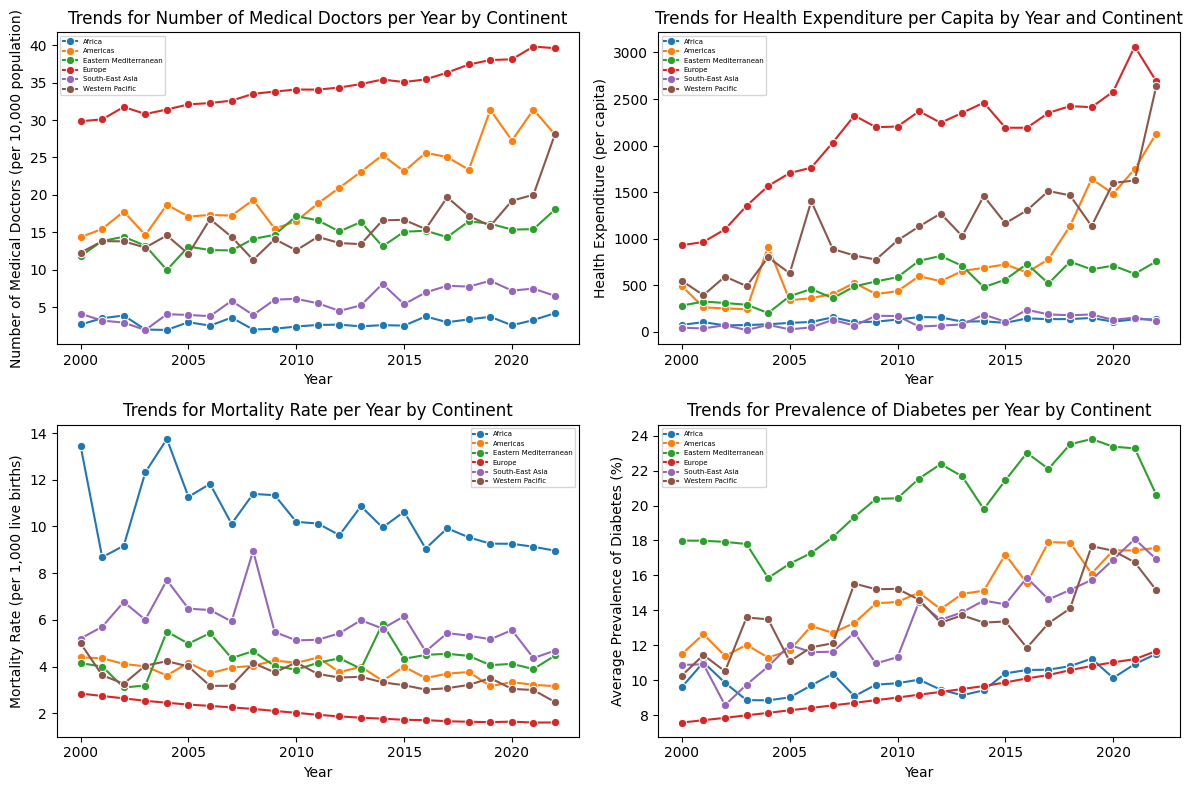

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Line Plot: Number of Medical Doctors per Year
sns.lineplot(x='Year', y='avg_medical_doctors', hue='Continent', data=grouped_by_year_continent, ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Trends for Number of Medical Doctors per Year by Continent')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Medical Doctors (per 10,000 population)')
axs[0, 0].legend(loc='upper left', fontsize='5')

# 2. Line Plot: Health Expenditure per Capita per Year
sns.lineplot(x='Year', y='avg_health_expenditure', hue='Continent', data=grouped_by_year_continent, ax=axs[0, 1], marker='o')
axs[0, 1].set_title('Trends for Health Expenditure per Capita by Year and Continent')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Health Expenditure (per capita)')
axs[0, 1].legend(loc='upper left', fontsize='5')

# 3. Line Plot: Mortality Rate per Year
sns.lineplot(x='Year', y='avg_adolescent_mortality', hue='Continent', data=grouped_by_year_continent, ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Trends for Mortality Rate per Year by Continent')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Mortality Rate (per 1,000 live births)')
axs[1, 0].legend(loc='upper right', fontsize='5')

# 4. Line Plot: Prevalence of Diabetes per Year
sns.lineplot(x='Year', y='avg_prevalence_diabetes', hue='Continent', data=grouped_by_year_continent, ax=axs[1, 1], marker='o')
axs[1, 1].set_title('Trends for Prevalence of Diabetes per Year by Continent')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Average Prevalence of Diabetes (%)')
axs[1, 1].legend(loc='upper left', fontsize='5')

plt.tight_layout()
plt.show()


Based on the first graph, European countries consistently have the highest number of doctors, with a steady increment over the years. The Americas have an inconsistent but gradual increase, while the Western Pacific has a gradual increase until 2019 when the number of doctors will increase significantly until 2022. Eastern Mediterranean shows significant fluctuations over the years, with an upward trend. However, South-East Asia and Africa have had no significant improvement over the years, where both continents never reached 10 doctors per 10,000 population.

For the second graph, Europe has the highest health expenditure per capita, with significant growth over the years. Western Pacific faces uneven increments, with the biggest leap being from 2021 to 2022. Americas had a turnover from 2003 to 2005, then gradually increased starting in 2016. On the other hand, Eastern Mediterranean, South-East Asia, and Africa have had no improvement in health expenditure, being under 1000 US$ per capita. This may be due to economic and currency differences faced by those continents. However, both South-East Asia and Africa are alarmingly low, which is open to new concerns for the future population to seek health benefits.

On the third graph, Africa has the highest mortality rate but shows improvement over the years, reaching only 9 mortality rates per 1,000 in 2022. Despite a steady decline, it remains the highest among all regions. South-East Asia comes second overall in the range of observation years but managed to decrease the rate until almost the same time as three other continents: Eastern Mediterranean, Western Pacific, and Americas. Those three continents have a somewhat consistent decrease in the rate of mortality, indicating global improvements in healthcare and living conditions. Europe has the lowest mortality rate, which has consistently declined over the years.

For the last graph, the Eastern Mediterranean has the highest level of diabetes, significantly different from other continents. Americas, the Western Pacific, and South-East Asia have also gradually increased the rate over the years, with the Western Pacific having a huge turnover from 2015 to 2019. All three continents experience some high decline, but the inconsistent decrement only leads to more increase until they are under the range of 14-18 prevalence of diabetes. Europe has shown a steady increase in diabetes over the years. Africa shows some improvement, with the lowest prevalence in 2013-2014 and 2020-2022, beating Europe. However, there is still a slight rise from 2020-2022.

#### **2. What is the relationship between the average number of medical doctors per 10 000 populations and the average health expenditure per capita across different continents?**


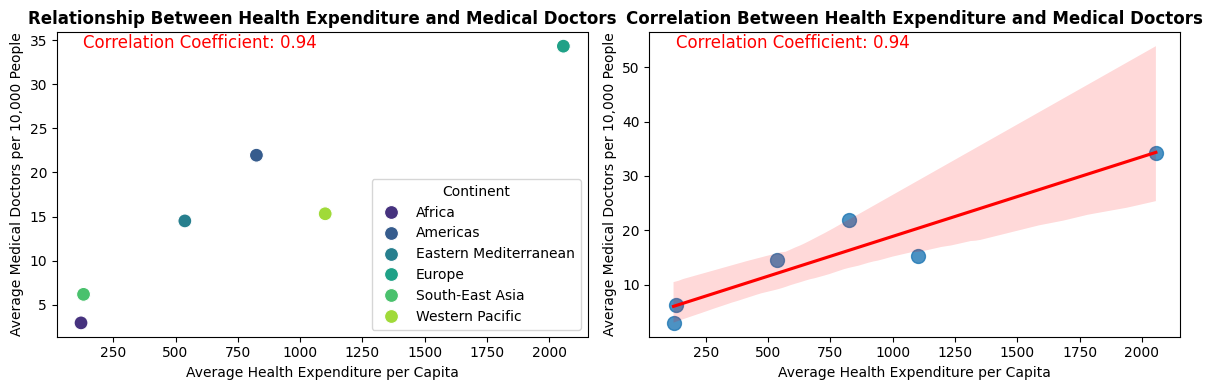

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 1. Scatter plot: Health Expenditure vs Medical Doctors
sns.scatterplot(
    data=grouped_by_continent,
    x="avg_health_expenditure",
    y="avg_medical_doctors",
    hue="Continent",
    palette="viridis",
    s=100,
    ax=axs[0]
)
axs[0].set_title("Relationship Between Health Expenditure and Medical Doctors", fontweight='bold')
axs[0].set_xlabel("Average Health Expenditure per Capita")
axs[0].set_ylabel("Average Medical Doctors per 10,000 People")

# Calculate and display correlation coefficient
correlation = grouped_by_continent["avg_health_expenditure"].corr(grouped_by_continent["avg_medical_doctors"])
axs[0].annotate(f"Correlation Coefficient: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

# 2. Scatter plot: Health Expenditure vs Medical Doctors with Correlation Line
sns.regplot(
    data=grouped_by_continent,
    x="avg_health_expenditure",
    y="avg_medical_doctors",
    scatter_kws={"s": 100},
    line_kws={"color": "red"},
    ax=axs[1]
)
axs[1].set_title("Correlation Between Health Expenditure and Medical Doctors", fontweight='bold')
axs[1].set_xlabel("Average Health Expenditure per Capita")
axs[1].set_ylabel("Average Medical Doctors per 10,000 People")
axs[1].annotate(f"Correlation Coefficient: {correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

plt.tight_layout()
plt.show()

There is a strong positive correlation(0.94) between the average number of medical doctors per 10,000 people and the average health expenditure per capita. This shows that as more expenses are spent on healthcare, the number of medical doctors per 10,000 people would also increases. Africa is clustered at the lowest and most left graph, indicating their lack of health expenditure (less than 250 US dollar per capita) resulting to having such low average number of medical doctors (2 per 10,000 people). South-East Asia also have similar expenses to Africa, but the difference in number (6-7) is notable, indicating some other variable that may influence the number of medical doctors. This can also be seen from Eastern Mediterranean and Western Pacific, where the gap of expenditure is rather big (approximately 750 US dollar per capita), but their average number of medical doctors are almost similar. It can be assume that the expenses on both continents may have been used for different goals. Europe stand as the highest in average number of medical doctors, given that its expenditure is also the highest compared to other continents.

#### **3. How do regions or countries differ in their levels of health expenditure per capita, and its correlation with adolescent mortality rates?**


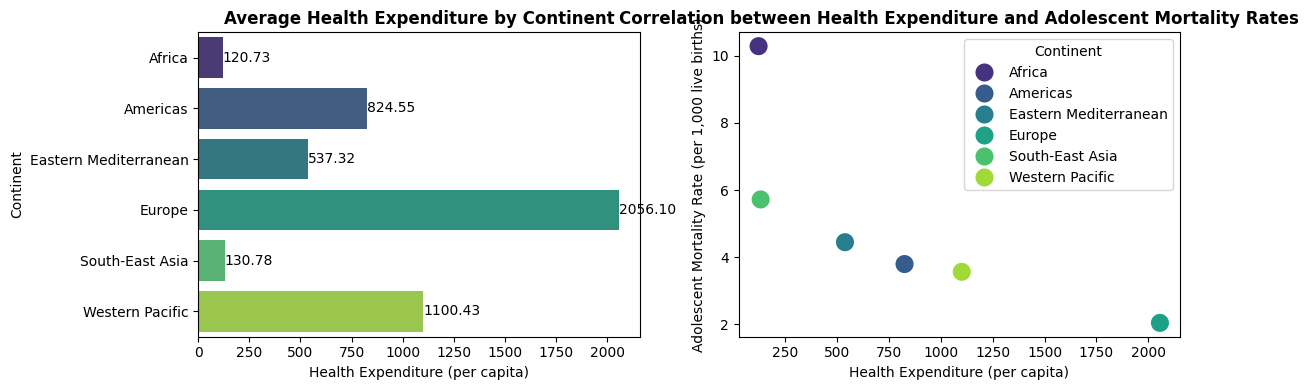

In [15]:


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 1. Bar Chart: Average Health Expenditure by Continent
sns.barplot(x='avg_health_expenditure', y='Continent', data=grouped_by_continent,
            hue='Continent', dodge=False, palette='viridis', ax=axs[0])
for bar in axs[0].patches:
    axs[0].text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10, color='black')
axs[0].set_title('Average Health Expenditure by Continent', fontweight='bold')
axs[0].set_xlabel('Health Expenditure (per capita)')
axs[0].set_ylabel('Continent')

# 2. Scatter Plot: Health Expenditure vs Adolescent Mortality Rates
sns.scatterplot(x='avg_health_expenditure', y='avg_adolescent_mortality',
                data=grouped_by_continent, ax=axs[1], hue='Continent', palette='viridis', s=200)
axs[1].set_title('Correlation between Health Expenditure and Adolescent Mortality Rates', fontweight='bold')
axs[1].set_xlabel('Health Expenditure (per capita)')
axs[1].set_ylabel('Adolescent Mortality Rate (per 1,000 live births)')

plt.tight_layout()
plt.show()

On the first graph, there are significant regional difference in average health expenditure per capita, with more advanced continent like Europe allocate bigger budget on healthcare compared to lower-income regions. Even with Western Pacific comes second in the bar, it is almost half from Europe ones. This can be seen that Europe countries put health provision as top priority to their citizen. Americas and Eastern Mediterranean have acceptable health expenditure, with 824.55 and 537.32 respectively. South-East Asia and Africa however have alarming average per capita, with none of them reach 150 US dollar per capita.

For the second graph, there is a negative correlation between health expenditure and adolescent mortality rates. Europe with the highest expenditure, shows an excellent number of mortality rate (approximately 2 per 1,000 live births). Western Pacific, Americas and Eastern Mediterranean have similar rate (3-5 per 1,00 live births) shows that even with contrast expenses, they only have slight dissimalirities. However, the stark contrast between South-East Asia and Africa mortality rate is concerning. Even with similar expenses, Africa has a shocking mortality rate (higher that 10 per 1,000 live births) while South-East Asia is more near with the other three continents (below 6 per 1,00 live births). This indicates the higher investments in healtcare associates to better adolescent health outcomes while also other variables that may influence the mortality rate.  

#### **4. What are the trends in adolescent mortality rates globally?**

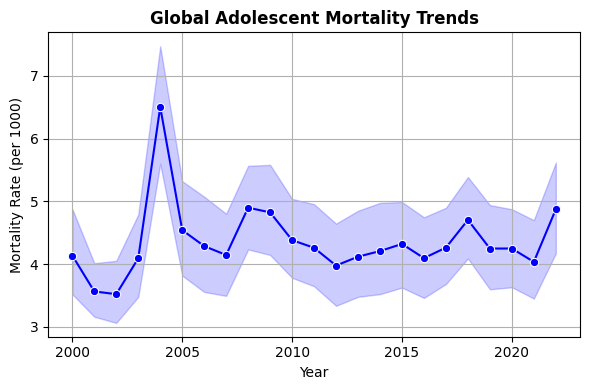

In [16]:
plt.figure(figsize=(6, 4))

sns.lineplot(
    data=grouped_by_year_country,
    y="avg_adolescent_mortality",
    x="Year",
    marker="o",
    color="blue",
)

plt.title("Global Adolescent Mortality Trends", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Mortality Rate (per 1000)")
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

The global adolescent mortality trends show an initial spike in 2004, where the rate peaked at over 7 per 1,000. This indicate a significant rise in mortality during that period, likely due to the regional impact of health crises such as HIV/AIDS, particularly in African countries. This is followed by a gradual decline from 2004 to 2015, reflecting improvements in global healthcare. From 2015 to 2022, the mortality rate stabilizes with slight fluctuations, indicating consistent yet uneven progress.

#### **5. How does the prevalence of diabetes correlate with adolescent mortality, and does healthcare expenditure mitigate its impact?**

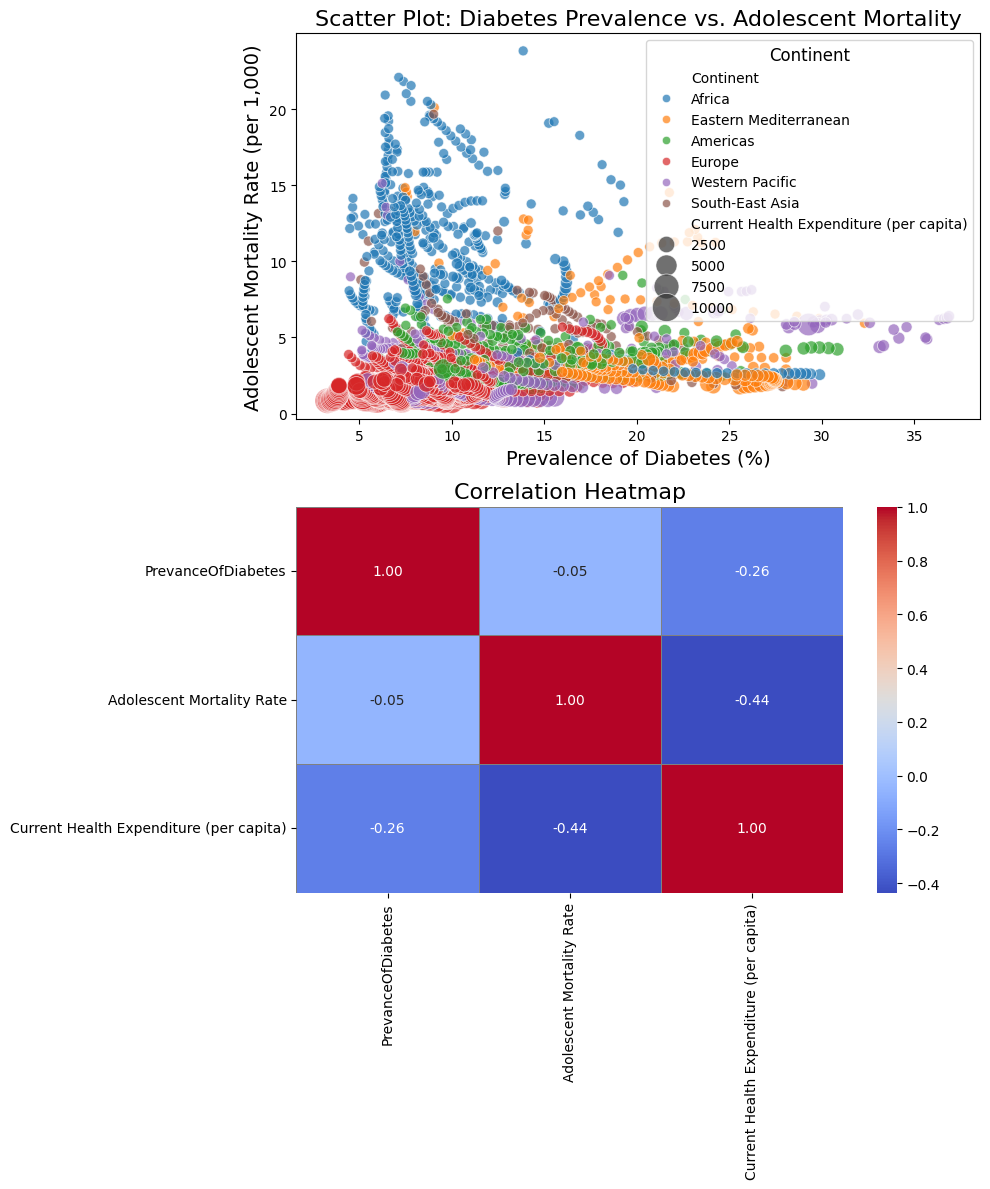

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# 1. Bubble Plot: Diabetes Prevalence vs Adolescent Mortality
bubble = sns.scatterplot(
    data=overall_merged,
    x="PrevanceOfDiabetes",
    y="Adolescent Mortality Rate",
    size="Current Health Expenditure (per capita)",
    hue="Continent",
    sizes=(50, 500),
    alpha=0.7,
    palette="tab10",
    ax=axes[0]
)

axes[0].set_title("Scatter Plot: Diabetes Prevalence vs. Adolescent Mortality", fontsize=16)
axes[0].set_xlabel("Prevalence of Diabetes (%)", fontsize=14)
axes[0].set_ylabel("Adolescent Mortality Rate (per 1,000)", fontsize=14)
axes[0].legend(title="Continent", fontsize=10, title_fontsize=12, loc="upper right")

# 2. Correlation Heatmap
correlation_matrix = overall_merged[
    ["PrevanceOfDiabetes", "Adolescent Mortality Rate", "Current Health Expenditure (per capita)"]
].corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor="gray",
    ax=axes[1]
)

axes[1].set_title("Correlation Heatmap", fontsize=16)

plt.tight_layout()
plt.show()

The prevalence of diabetes has a very weak negative correlation with adolescent mortality (-0.05), as seen in the heatmap, suggesting that diabetes prevalence alone has minimal direct influence on adolescent mortality rates. However, the scatter plot reveals a trend where regions with lower healthcare expenditure (smaller data points) tend to have higher adolescent mortality rates, even at moderate diabetes prevalence levels. On the other hand, countries with higher healthcare expenditure (larger data points) show significantly lower mortality rates despite similar or even higher diabetes prevalence. This is further supported by the moderate negative correlation between healthcare expenditure and adolescent mortality (-0.44), highlighting that healthcare investment plays a critical role in reducing mortality. Additionally, the weak negative correlation between healthcare expenditure and diabetes prevalence (-0.26) suggests that better healthcare systems may contribute to improved diabetes management. Overall, while diabetes prevalence alone has a limited direct impact on adolescent mortality, healthcare expenditure significantly mitigates its effects and improves health outcomes.

#### **6. How does the prevalence of diabetes correlate with per capita health expenditure across different regions and time periods?**

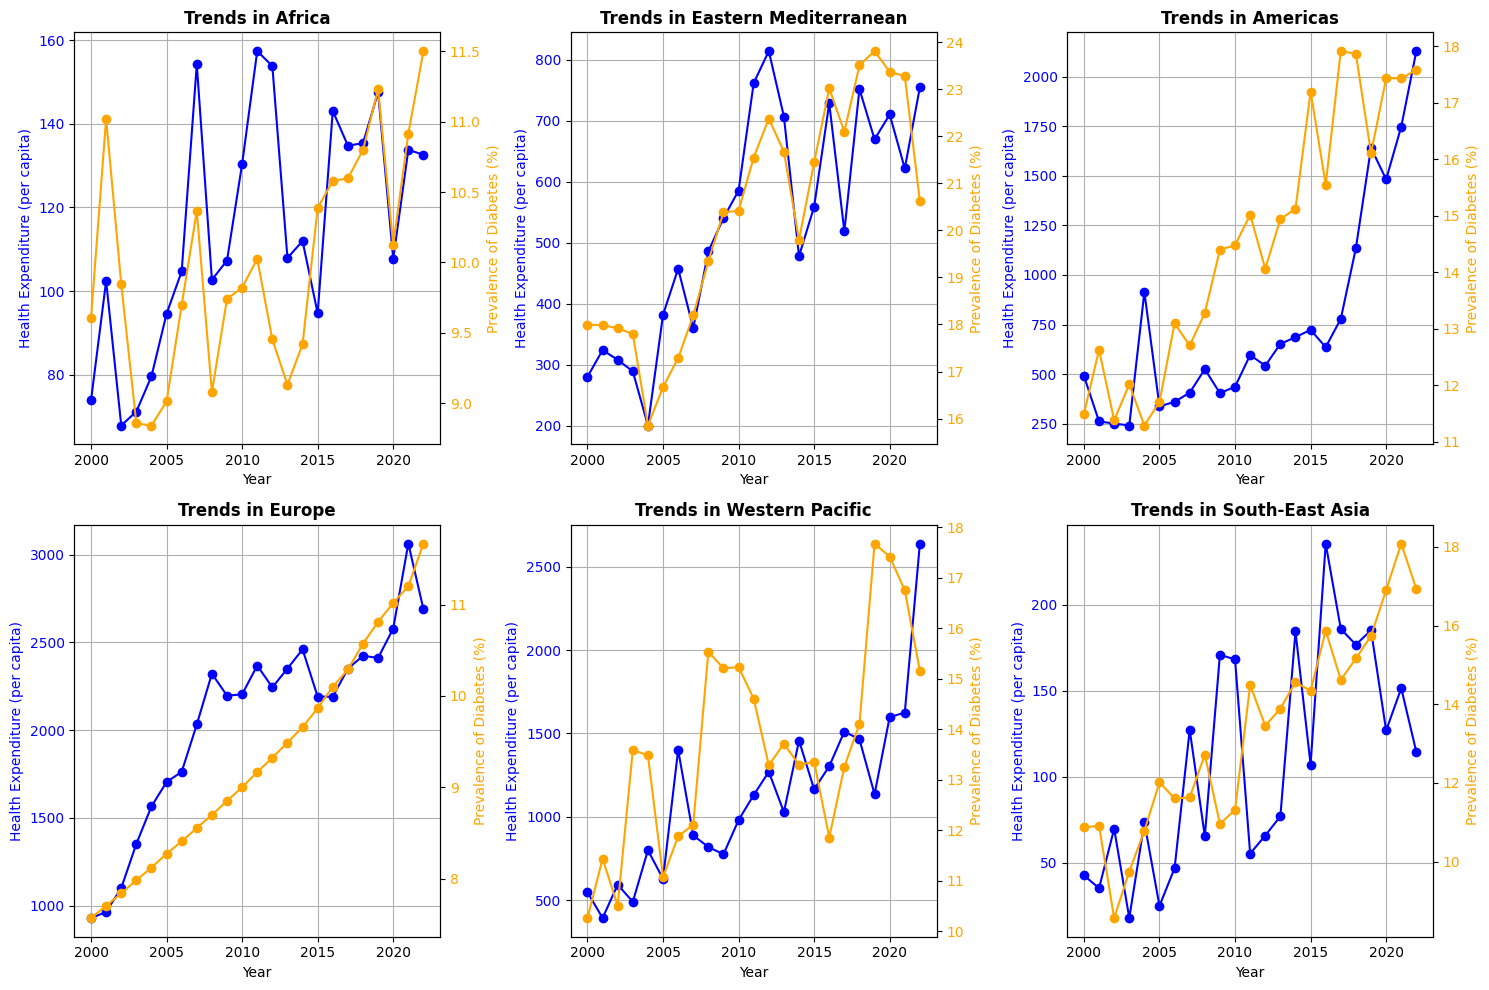

In [18]:
grouped_by_year_continent = overall_merged.groupby(["Year", "Continent"]).agg(
    avg_medical_doctors=("Medical doctors (per 10000)", "mean"),
    avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
    avg_adolescent_mortality=("Adolescent Mortality Rate", "mean"),
    avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean"),
).reset_index()

unique_continents = overall_merged['Continent'].unique()
num_continents = len(unique_continents)

cols = 3
rows = (num_continents + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()

for i, continent in enumerate(unique_continents):
    continent_data = grouped_by_year_continent[grouped_by_year_continent['Continent'] == continent]

    axs[i].plot(
       continent_data["Year"],continent_data["avg_health_expenditure"],
        color="blue", marker="o", label="Health Expenditure (per capita)"
    )
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Health Expenditure (per capita)", color="blue")
    axs[i].tick_params(axis="y", labelcolor="blue")
    axs[i].grid(True)

    ax2 = axs[i].twinx()
    ax2.plot(
        continent_data["Year"], continent_data["avg_prevalence_diabetes"],
        color="orange", marker="o", label="Prevalence of Diabetes (%)"
    )
    ax2.set_ylabel("Prevalence of Diabetes (%)", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

    axs[i].set_title(f"Trends in {continent}", fontweight='bold')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Each region demonstrates unique trends, highlighting the complexity of health expenditure's impact on diabetes control. The analysis of temporal trends between health expenditure and diabetes prevalence from 2000 to 2022 is depicted above. Data indicates a steady increase in health expenditure per capita for all regions, particularly after 2010. In addition, most of the regions' the prevalence of diabetes has shown an upward trend.

Health expenditure per capita and diabetes prevalence exhibit varying trends across different regions. In Africa, health expenditure peaked at over 150, with diabetes prevalence exceeding 10% in 2011 and rising to over 11.5% by 2022. The Eastern Mediterranean region saw health expenditure peak at over 800, with diabetes prevalence at over 22% in 2012, reaching a peak of over 23% in 2019 while expenditure fell to over 650. In the Americas, health expenditure peaked at over 2000 in 2022, with diabetes prevalence over 17% that year, peaking nearly at 18% in 2017 when expenditure was over 750. Europe had the highest health expenditure, peaking at over 3000 in 2022, with diabetes prevalence consistently above 11% in 2021 and 2022. In the Western Pacific, health expenditure peaked at over 2500 in 2022, while diabetes prevalence reached over 15% that year, peaking at over 17% in 2019 when expenditure was over 1000. Lastly, in South-East Asia, health expenditure peaked at over 200 in 2021, with diabetes prevalence nearly 16% in 2016 and reaching over 18% in 2021, when expenditure was over 150.

This suggests that, despite increased spending on health, diabetes rates remain high. It underscores that higher health expenditure does not guarantee a decrease in diabetes prevalence, indicating that the effectiveness of these expenditures in controlling diabetes may require further evaluation and more targeted strategies.

### Machine Learning:

#### 1. What factors most strongly influence adolescent mortality rates, and how can we predict future trends based on these factors?

Random Forest Performance:
Mean Absolute Error: 0.29
Root Mean Squared Error: 0.33
R-squared: -0.11
Forecasted Adolescent Mortality Rates (2023–2027):
   Year  Predicted Adolescent Mortality Rate
0  2023                             4.187991
1  2024                             4.104154
2  2025                             4.104154
3  2026                             4.104154
4  2027                             4.104154


C:\Users\HAFIZI\AppData\Local\Temp\ipykernel_22096\4139451945.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  latest_year_data = grouped_by_year[grouped_by_year_continent['Year'] == 2022][['avg_medical_doctors', 'avg_health_expenditure', 'avg_prevalence_diabetes']].mean().values


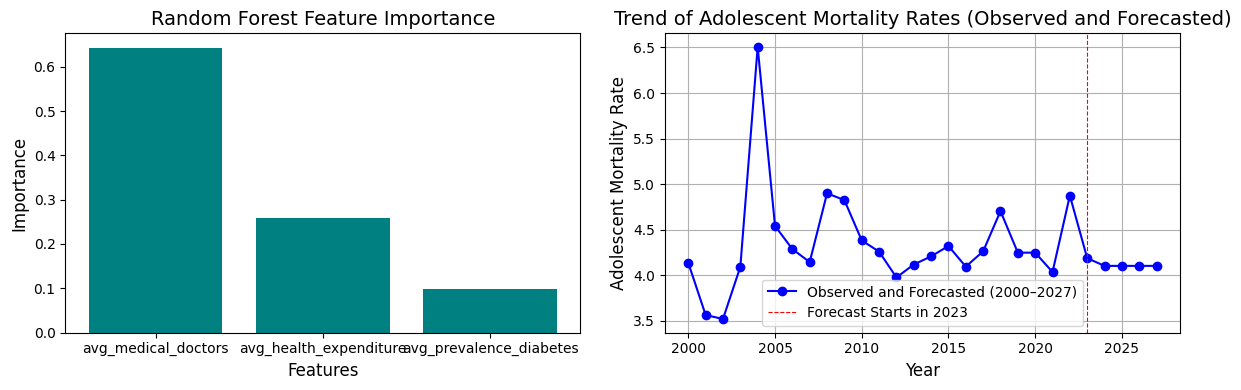

In [19]:
# Features and target variable
X = grouped_by_year[['avg_medical_doctors', 'avg_health_expenditure', 'avg_prevalence_diabetes']]
y = grouped_by_year['avg_adolescent_mortality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)

print("Random Forest Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions):.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2_score(y_test, rf_predictions):.2f}")

# Feature Importance
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Extract forecasted data
forecast_years = [2023, 2024, 2025, 2026, 2027]
latest_year_data = grouped_by_year[grouped_by_year_continent['Year'] == 2022][['avg_medical_doctors', 'avg_health_expenditure', 'avg_prevalence_diabetes']].mean().values

forecasts = []
for year in forecast_years:
    latest_year_df = pd.DataFrame([latest_year_data], columns=['avg_medical_doctors', 'avg_health_expenditure', 'avg_prevalence_diabetes'])
    predicted_mortality = rf_model.predict(latest_year_df)[0]
    forecasts.append(predicted_mortality)
    latest_year_data = np.array([*latest_year_data[:2], predicted_mortality])

# Create a DataFrame for forecasted data
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'Predicted Adolescent Mortality Rate': forecasts
})
print("Forecasted Adolescent Mortality Rates (2023–2027):")
print(forecast_df)

# Combine past data and forecasts for a continuous line
years = grouped_by_year['Year'].unique()
yearly_avg_mortality = grouped_by_year.groupby('Year')['avg_adolescent_mortality'].mean()

total_years = np.concatenate((years, forecast_years))
total_mortality = np.concatenate((yearly_avg_mortality, forecasts))

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot feature importance on the first subplot
axes[0].bar(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='teal')
axes[0].set_title('Random Forest Feature Importance', fontsize=14)
axes[0].set_xlabel('Features', fontsize=12)
axes[0].set_ylabel('Importance', fontsize=12)

# Plot observed and forecasted data on the second subplot
axes[1].plot(total_years, total_mortality, label="Observed and Forecasted (2000–2027)", marker="o", color="blue")
axes[1].axvline(x=2023, color="red", linestyle="--", linewidth=0.8, label="Forecast Starts in 2023")
axes[1].set_title("Trend of Adolescent Mortality Rates (Observed and Forecasted)", fontsize=14)
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Adolescent Mortality Rate", fontsize=12)
axes[1].legend()
axes[1].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The factor most strongly influencing adolescent mortality rates is the availability of medical professionals, as it contributes over 64% to the predictive power of the Random Forest model. This underscores the critical role of healthcare workforce availability in reducing mortality rates. Health expenditure also plays a moderate role, supporting improved healthcare access and resources, while the prevalence of diabetes has minimal impact on adolescent mortality.

Future trends indicate a continued decline in mortality rates, stabilizing at around 4.1 from 2024 to 2027. This suggests that existing improvements in healthcare infrastructure and workforce have been effective but may be reaching their limit. To further reduce adolescent mortality, future interventions should focus on increasing medical professional availability in under-resourced areas, ensuring efficient use of health funds, and addressing broader systemic factors like socio-economic conditions and healthcare equity. Additionally, analyzing recent successful policies that led to the sharp decline around 2022 can guide strategies for sustained improvement.

#### 2. What is the estimated prevalence of diabetes correlate with per capita health expenditure across different regions and time periods until 2030

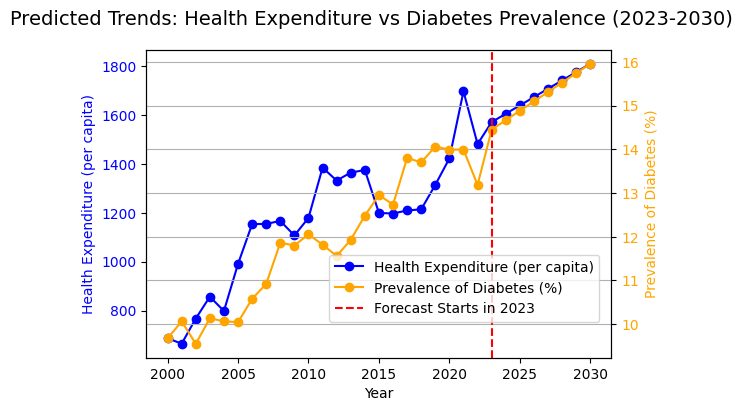

In [20]:
X = grouped_by_year[['Year']]
y_health = grouped_by_year['avg_health_expenditure']
y_diabetes = grouped_by_year['avg_prevalence_diabetes']

model_health = LinearRegression()
model_health.fit(X, y_health)

model_diabetes = LinearRegression()
model_diabetes.fit(X, y_diabetes)

future_years = pd.DataFrame({'Year': np.arange(2023, 2031)})

future_health_preds = model_health.predict(future_years)
future_diabetes_preds = model_diabetes.predict(future_years)

predictions_health = pd.DataFrame({'Year': future_years['Year'], 'avg_health_expenditure': future_health_preds})
predictions_diabetes = pd.DataFrame({'Year': future_years['Year'], 'avg_prevalence_diabetes': future_diabetes_preds})

combined_data_health = pd.concat([grouped_by_year[['Year', 'avg_health_expenditure']], predictions_health], ignore_index=True)
combined_data_diabetes = pd.concat([grouped_by_year[['Year', 'avg_prevalence_diabetes']], predictions_diabetes], ignore_index=True)

fig, ax1 = plt.subplots(figsize=(6, 4))

line1, = ax1.plot(
    combined_data_health["Year"], combined_data_health["avg_health_expenditure"],
    color="blue", marker="o", label="Health Expenditure (per capita)"
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Health Expenditure (per capita)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
line2, = ax2.plot(
    combined_data_diabetes["Year"], combined_data_diabetes["avg_prevalence_diabetes"],
    color="orange", marker="o", label="Prevalence of Diabetes (%)"
)
ax2.set_ylabel("Prevalence of Diabetes (%)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Vertical line for the year 2023
red_line = plt.axvline(x=2023, color='red', linestyle='--', label='Year 2023')

# Combined legend inside the plot at the bottom right
lines = [line1, line2, red_line]
labels = [line1.get_label(), line2.get_label(), 'Forecast Starts in 2023']
fig.legend(lines, labels, loc="lower right", bbox_to_anchor=(0.88, 0.2), borderaxespad=0.)

# Title and grid
fig.suptitle("Predicted Trends: Health Expenditure vs Diabetes Prevalence (2023-2030)", fontsize=14)
plt.grid()
plt.show()


The graph shows the trends and forecasting of health expenditure per capita and diabetes prevalence (%) from 2000 to 2030 of the overall regions. Health expenditure (blue line) starts at around 686 per capita in 2000, gradually increases with some fluctuations, and reaches approximately 200 per capita by 2030. Diabetes prevalence (orange line) starts at over 10% in 2000 and steadily rises to around 20% by 2030. A red dashed line at 2023 marks the beginning of the forecasted values, where both health expenditure and diabetes prevalence show a steady upward trend. The graph highlights how health expenditure and diabetes prevalence have been increasing over the years and are predicted to continue growing.

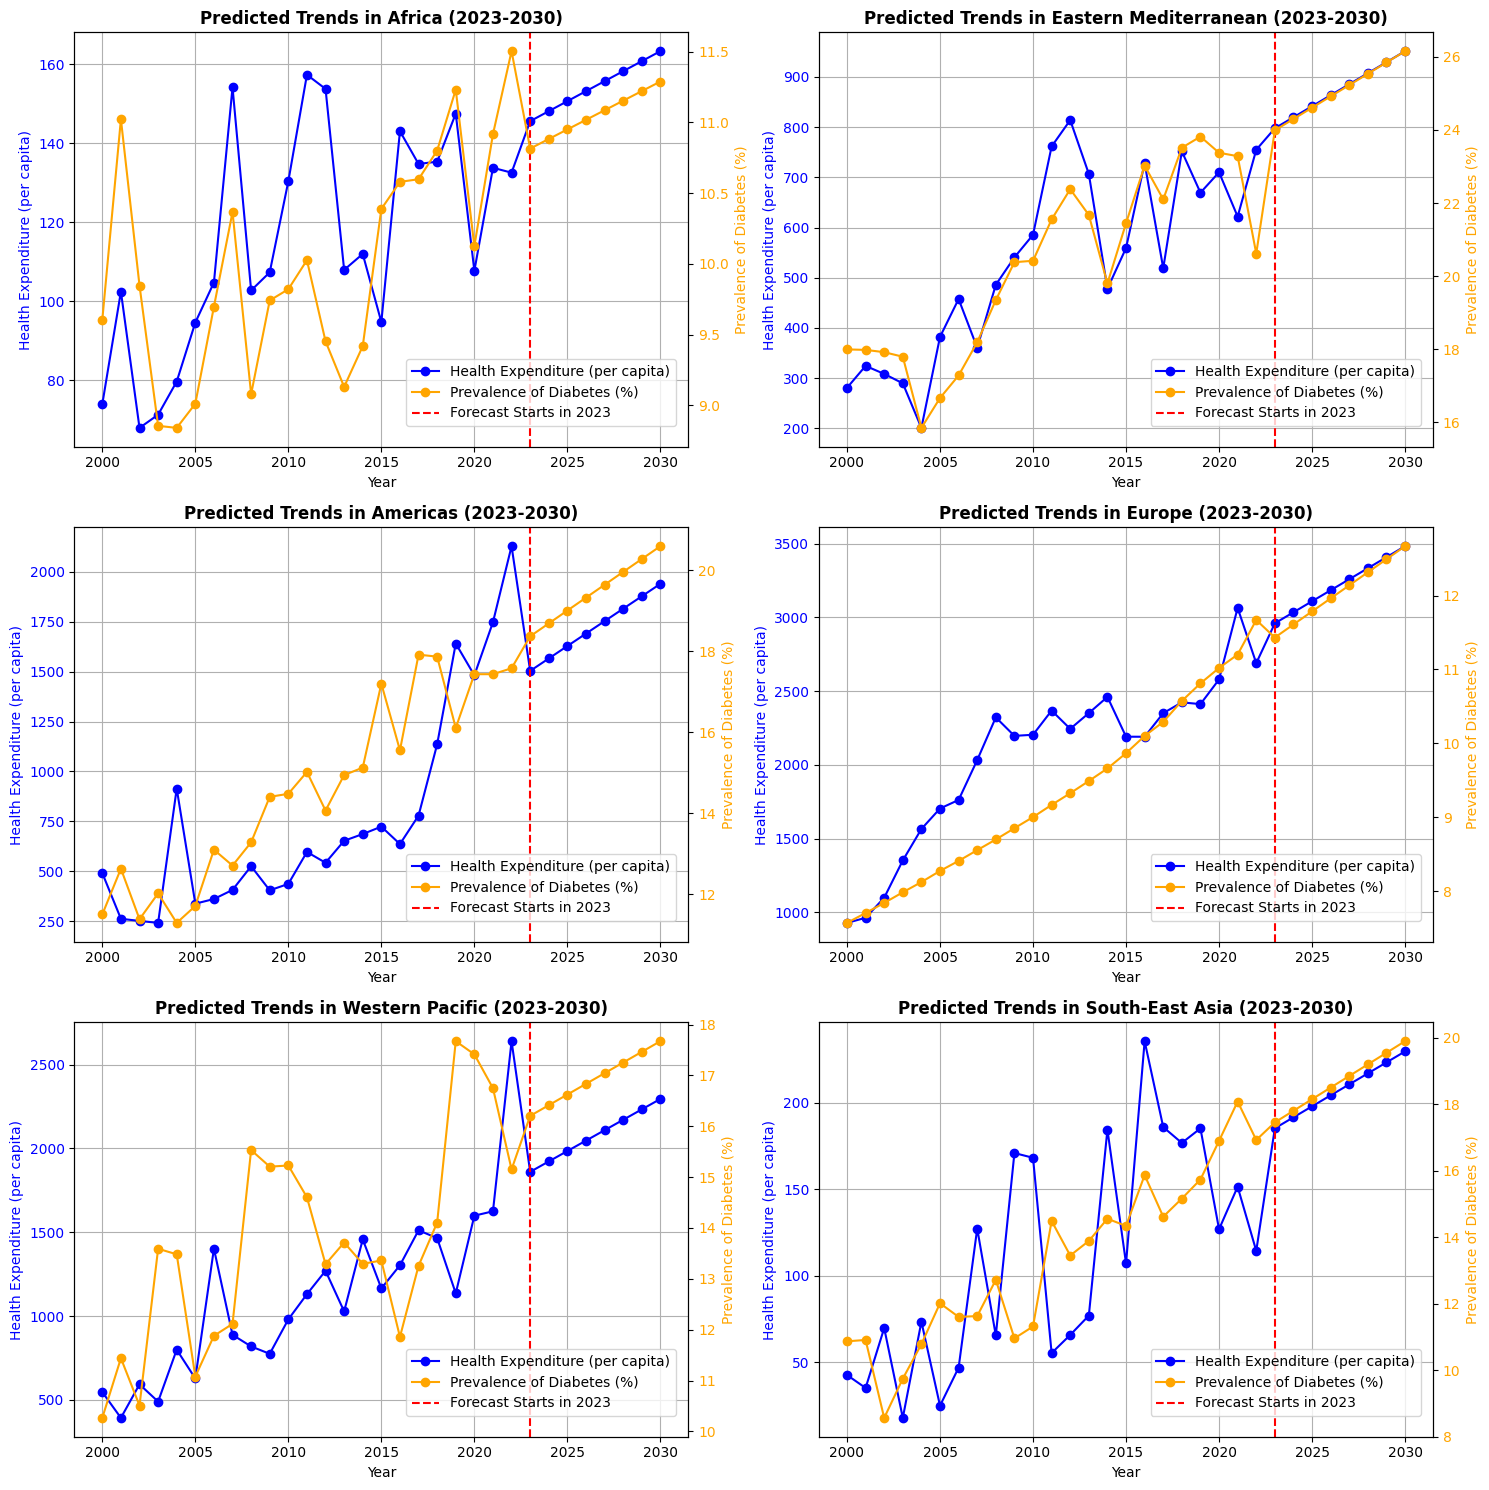

In [21]:
unique_continents = overall_merged['Continent'].unique()
num_continents = len(unique_continents)

cols = 2
rows = (num_continents + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axs = axs.flatten()

for i, continent in enumerate(unique_continents):
    continent_data = overall_merged[overall_merged['Continent'] == continent]

    grouped_by_year_continent = continent_data.groupby(["Year"]).agg(
        avg_health_expenditure=("Current Health Expenditure (per capita)", "mean"),
        avg_prevalence_diabetes=("PrevanceOfDiabetes", "mean")
    ).reset_index()

    future_years = pd.DataFrame({'Year': np.arange(2023, 2031)})
    X = grouped_by_year_continent[['Year']]

    model_health = LinearRegression()
    model_health.fit(X, grouped_by_year_continent['avg_health_expenditure'])

    model_diabetes = LinearRegression()
    model_diabetes.fit(X, grouped_by_year_continent['avg_prevalence_diabetes'])

    future_health_preds = model_health.predict(future_years)
    future_diabetes_preds = model_diabetes.predict(future_years)

    predictions_health = pd.DataFrame({'Year': future_years['Year'], 'avg_health_expenditure': future_health_preds})
    predictions_diabetes = pd.DataFrame({'Year': future_years['Year'], 'avg_prevalence_diabetes': future_diabetes_preds})

    combined_data_health = pd.concat([grouped_by_year_continent[['Year', 'avg_health_expenditure']], predictions_health], ignore_index=True)
    combined_data_diabetes = pd.concat([grouped_by_year_continent[['Year', 'avg_prevalence_diabetes']], predictions_diabetes], ignore_index=True)

    axs[i].plot(
        combined_data_health["Year"], combined_data_health["avg_health_expenditure"],
        color="blue", marker="o", label="Health Expenditure (per capita)"
    )
    axs[i].set_xlabel("Year")
    axs[i].set_ylabel("Health Expenditure (per capita)", color="blue")
    axs[i].tick_params(axis="y", labelcolor="blue")
    axs[i].grid(True)

    ax2 = axs[i].twinx()
    ax2.plot(
        combined_data_diabetes["Year"], combined_data_diabetes["avg_prevalence_diabetes"],
        color="orange", marker="o", label="Prevalence of Diabetes (%)"
    )
    ax2.set_ylabel("Prevalence of Diabetes (%)", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

    # Vertical line for the year 2023
    red_line = axs[i].axvline(x=2023, color='red', linestyle='--', label='Forecast Start in 2023')

    axs[i].set_title(f"Predicted Trends in {continent} (2023-2030)", fontweight='bold')

    # Combined legend inside the plot at the bottom right
    lines = [axs[i].get_lines()[0], ax2.get_lines()[0], red_line]
    labels = ["Health Expenditure (per capita)", "Prevalence of Diabetes (%)", "Forecast Starts in 2023"]
    axs[i].legend(lines, labels, loc="lower right", bbox_to_anchor=(0.98, 0.05), borderaxespad=0.)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

The output includes six line plots that illustrate the predicted trends in health expenditure and diabetes prevalence for Africa, the Eastern Mediterranean, the Americas, Europe, the Western Pacific, and South-East Asia from 2023 to 2030.Each plot features the years on the x-axis, while the left y-axis indicates the average health expenditure per capita, represented by a blue line. The right y-axis displays the prevalence of diabetes as a percentage, shown by an orange line.A vertical red dashed line marks the year 2023 in all plots, indicating the start of the forecast period.

In Africa and the Eastern Mediterranean, both health expenditure and diabetes prevalence show significant upward trends. The Americas exhibit steady increases in health expenditure alongside rising diabetes prevalence, signaling growing health concerns. Europe demonstrates a more stable trend in health expenditure, with a gradual rise in diabetes prevalence.

In the Western Pacific, health expenditure sharply increases, correlating with a rise in diabetes prevalence, suggesting emerging health challenges. Similarly, South-East Asia shows a notable increase in both health expenditure and diabetes prevalence, highlighting the urgent need for targeted health interventions.

Overall, these trends underscore the rising health expenditure and diabetes prevalence across different regions, emphasizing the necessity for effective health policies and interventions to address these public health issues. Forecasting from 2023 to 2030, it is anticipated that, despite potential increases in health expenditure, diabetes rates may continue to remain high. This suggests that simply increasing funding for health services may not be sufficient to achieve a significant reduction in diabetes prevalence.

# **Section iii**

### Conclusion

The analysis across various continents based on the six reseach questions reveals significant trends and correlations in healthcare metrics, particularly concerning number of medical professionals, health expenditure, mortality rates, and diabetes prevalence. Europe consistently leads in the number of medical doctors per 10,000 population and consistently displaying a steady increase. In contrast, Africa and South-East Asia show stagnation in healthcare resources, highlighting disparities that they region requires urgent attention. There is a clear relationship between health expenditure and adolescent mortality rates, with regions that allocate higher health spending tending to experience lower mortality rates. However, Africa and South-East Asia, despite similar expenditures, exhibit starkly different outcomes, indicating the complexity of health determinants in these regions which can be caused by the life style of the population itselves.

The prevalence of diabetes is rising globally, particularly in the Eastern Mediterranean, which shows the highest rates. However, diabetes prevalence does not correlate directly with adolescent mortality but healthcare expenditure plays a crucial role in mitigating adverse health outcomes. Insights from predictive modeling indicate that the availability of medical professionals is the most significant factor influencing adolescent mortality, emphasizing the need for more healthcare workers in under-resourced areas. While health expenditure contributes to better health outcomes, its impact is less pronounced than that of workforce availability.

Forecasting trends suggest that both health expenditure and diabetes prevalence will continue to rise, indicating that simply increasing health spending may not be sufficient to control diabetes rates or improve health outcomes without targeted interventions. These findings underscore the necessity for tailored health policies that address systemic inequities, enhance healthcare workforce availability, and focus on effective diabetes management to improve adolescent health outcomes globally.

